# Programming for Data Analysis

## Project 2018

### Introduction
The goal of this notebook is to synthesize a dataset to reflect a real world phenomenon for which, at least one hundred samples with four differnt variables could be obtained. Commuting was chosen as the topic, specifically commuting by bicycle. 

This notebook contains:
* Research of communting habits in Ireland  and assocated data.
* The creation of a datset to reflect this data using Python
* An analysis of created dataset and comparison to expected data
![Cyclists Commuting](img/commuters.jpg)
*Commuting by bike*

### Research
In researching this topic, it was decided, as much as possible, to focus on commuting by bicycle in Ireland. The main source of official information on this topic was found to be the Central Statistics Office(CSO). As the CSO has data from a number of years relating to commuting habits, it was decided that the most recent data would be chosen as the reference data for the synthesised data.


**The Data**

Exploring the CSO data, three possible variables to be synthesised became apparent. These were, the sex of those that chose to commute to bike, their age and social class. However, information relating to commute times was not visible. As this seemed like a useful variable to consider, information on the average commute time by bicycle was obtained from the UK Department of transport, although using the UK data is not ideal, it does allow for a model to be constructed for synthesising such data, if the correct Irish data should become available at a later stage it can simple replace the UK data in the model.
Looking at the break down of males to females who commuted by bicycle in 2016 we can see in figure 1 below that 41,341 males commute by bicycle and 15,496 females doing so. This means that approximately 73% of bicycle commuters are male while 27% are female. Any synthesised data set should reflect this split.



Looking at the break down of males to females who commuted by bicycle in 2016 we can see in figure 1 below that 41,341 males commute by bicycle and 15,496 females doing so. This means that approximately 73% of bicycle commuters are male while 27% are female. Any synthesised data set should reflect this split. 
<img src="img/gender.PNG" width="800" />
*Fig. 1*

According the UK Department of Transport the average length of time a person rides a bike for is 23 minutes. The generated data set times should generate close to this average while allowing for a distribution that be expected to occur a large number of samples. 

The CSO break social class into seven different occupation types, the likelihood that any one of these social classes will commute by bike can be seen in figure 2. The percentage of each social class that commute by bike seen in CSO data should be seen in synthesised data set. 
<img src="img/social.png" width="800"/>
*Fig.2* 

The final variable, age, and how this impacts on ones likelihood to choose to commute by bicycle can be seen in figure 3. The CSO split this data into 12 different age groups. For the synthesised data set to reflect the real life data, ages generated will have to be done so according to the probability in the CSO data. The CSO states that the average age of cycling commuter is 33, thus the generated data set should  have an average age close to 33.
<img src="img/Age.PNG" width="800" />
*Fig.3*



### The Code

The code used the generate the synthesised dataset is shown below. The Numpy library is used through out the code in order to generate the random data samples needed. The Numpy random generator is seeded in order to allow the repplication of the generated samples. The Seaborn library is used for the plotting of data while the Pandas library is to create and manage the data frame.  

In [163]:
import pandas as pd # import need librarys 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5] #Set format of displayed plots



In [164]:
a1 = ([15,16,17,18,19])
a2=([20,21,22,23,24])
a3=([25,26,27,28,29])
a4=([30,31,32,33,34])
a5=([35,36,37,38,39])
a6=([40,41,42,43,44])
a7=([45,46,47,48,49])
a8=([50,51,52,53,54])
a9=([55,56,57,58,59])
a10=([60,61,62,63,64])
a11=([65,66,67,68,69])
a12=([70,71,72,73,74,75,76,77,78,79,80])
age=([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12])#Create array of from age group arrays 
gender = ['M', 'F']#Create gender option
social=["Professional",'Manager','Non-Manual','Skilled','Semi Skilled',"Unskilled",'Other'] #Create social class array
np.random.seed(seed=15)#seed generator to allow reproduction of values generated 
commute= pd.DataFrame(np.random.choice(gender, 200, p=[0.73, 0.27]), columns=["Gender"])#Create dataframe containingrandom but weighted genders 




In [165]:
np.random.seed(seed=15)#Seed for reproduction of values
Time_taken=np.random.poisson(23, 200)#Create 200 random times,but with overall average of 23
commute.loc[:,'Time Taken']=Time_taken #Add to dataframe 


In [166]:
np.random.seed(seed=15)#Seed for reproduction of values
social_rand= np.random.choice(social, 200, p=[0.15, 0.34, .17,.11,.15,.05,.03])#Create weighted social class data
commute.loc[:,'Social Class']=social_rand #Add to dataframe


In [167]:
Age = [] #Create empty an array called Age
age_prob=[0.1, 0.125, .155,.16,.115,.1,.085,.065,.02,.03,.035,.01]
np.random.seed(seed=2)#Seed for reproduction of values 
for i in np.random.choice(age, p=age_prob, size=200): #Create weighted age data and append to Age array, taken from stackexchange.com
    
    Age.append(np.random.choice(i))
commute.loc[:,'Age']=Age #Add to dataframe



### The  synthesised data set 


In [168]:
display(HTML(commute.to_html())) #Display data in a nice format 

,Gender,Time Taken,Social Class,Age
0,F,29,Semi Skilled,33
1,M,13,Manager,15
2,M,20,Professional,35
3,M,20,Manager,30
4,M,16,Manager,32
5,M,31,Non-Manual,25
6,M,28,Manager,23
7,M,18,Manager,35
8,M,11,Professional,28
9,M,27,Manager,26


### Analysis of  synthesised data set

Below each of the four variables synthesised are analysed and compared to the expected values taken form the real-world data. 

**Gender**
The CSO gender data suggests that the split between male and female commuters who choose to cycle was 73% and 27% respectively. The generated data seen in figure 4 has a 75.5% of the cyclists being male with 24.5% as female. While not matching exactly the CSO data, with a larger number of samples it possible that the percentages would move closer to 73% and 27% figures.


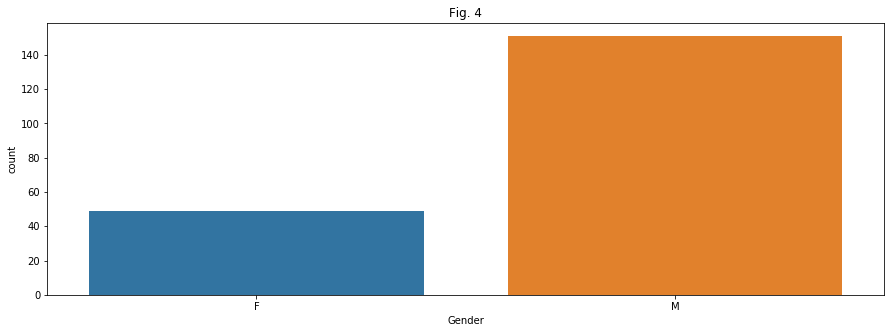

Total  number of male cyclists is: 151
Making up 75.5  % of total cyclists
Total number of female cyclists is: 49
Making up 24.5  % of total cyclists


In [169]:
sns.countplot(x="Gender", data=commute ).set_title("Fig. 4")
plt.show() #Disply break down of female V Male 
countM = commute['Gender'].eq('M').sum() #Count occurences of Males
countF=commute['Gender'].eq('F').sum()  #count occurences of Females
print ("Total  number of male cyclists is:" ,(countM)) #display count info
M_percentage=(countM/200)*100
print ("Making up",(M_percentage)," % of total cyclists")# and show as percentage of total
print ("Total number of female cyclists is:" ,(countF))#display count and percentage info
F_percentage=(countF/200)*100
print ("Making up",(F_percentage)," % of total cyclists")

**Journey Duration**
The UK Department of Transport give an average travel time of 23 minutes for cycling commuters, the synthesised data set generates an average journey time of 22.98 minutes. We can see from the histogram and boxplot in figure 5 and 6 below that although the mean journey time is close to 23 minutes, there is a natural spread of journey times across the data set.

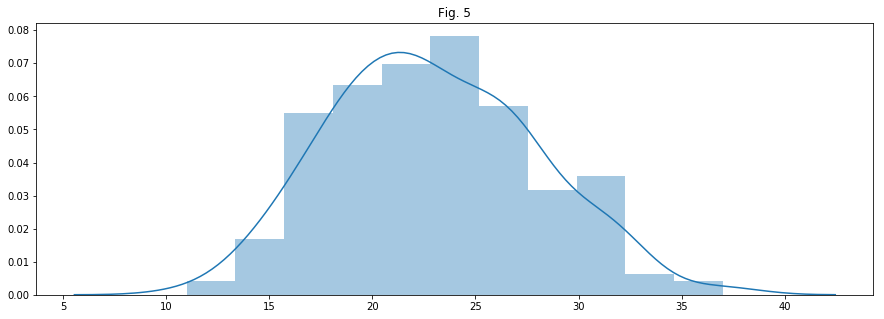

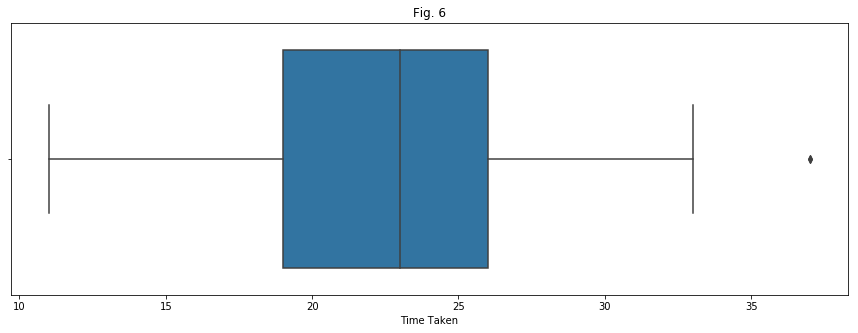

Avearge journey time is 22.98 minutes


In [170]:
sns.distplot(Time_taken).set_title('Fig. 5')#Create histogram of journey times
plt.show()
sns.boxplot(x=commute["Time Taken"]).set_title('Fig. 6') #Create box plot of journey times
plt.show()
time_mean=np.mean(Time_taken)
print ("Avearge journey time is",(time_mean),"minutes")# Show the mean journey time in minutes 

**Age**
According to the CSO data the average age of a commuter who cycles in Ireland is 33 years of age. The synthesised data set give an average age 33.98 years, this is above CSO data, but much like the gender data, a larger sample size may reduce this to be more in line with CSO data. The slightly higher average age for the generated data may be due to the use of age groups rather than ages by the CSO, as the generated data assumed even probability for each age within an age group, however that may not of been the case with the real world data. 
The ages generated when plotted do how even reflect the CSO plot seen in figure 3 above, with a skew towards younger commuters.


The mean age for  a cycling commuter is 33.98 years


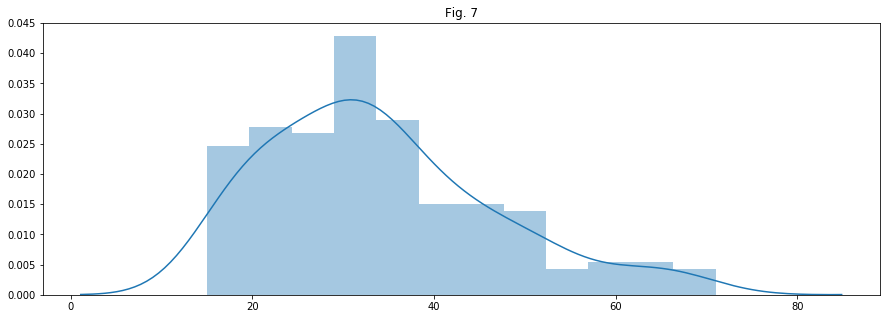

Text(0.5, 1.0, 'Fig. 8')

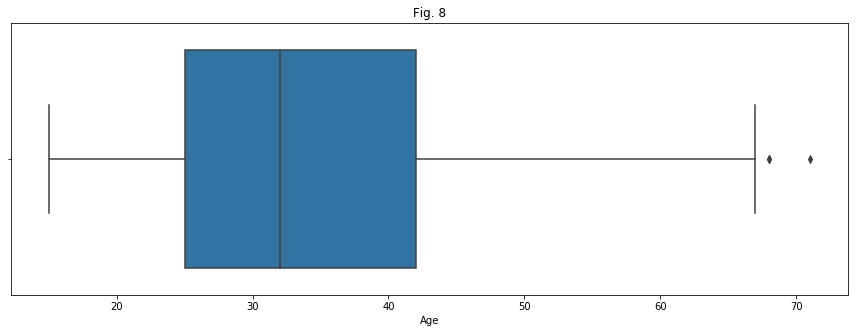

In [171]:
age_mean=np.mean(Age)
print ("The mean age for  a cycling commuter is",(age_mean),"years")# Show the mean age of commuters
sns.distplot(Age, bins=12).set_title('Fig. 7')
plt.show()
sns.boxplot(x=commute["Age"]).set_title('Fig. 8')





**Social Class**
The generated data for social class is plottedin figure 9 below. The distribution of closely matches that of the CSO plot for the real world data seen in figure 2 above. 

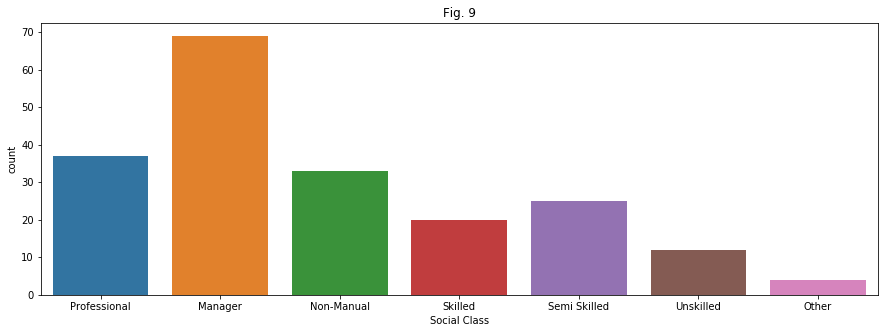

The percentage of commuters who are:
Professionals is  18.5 %
Managers is  34.5 %
Non Manual workers is  16.5 %
Skilled workers is  10.0 %
Semi-skilled workers is  12.5 %
Unskilled workers is  6.0 %
Other worker types is  2.0 %


In [191]:
sns.countplot(x="Social Class", order= social,data=commute).set_title('Fig. 9')
plt.show()
count_pro = commute['Social Class'].eq('Professional').sum()
count_man = commute['Social Class'].eq('Manager').sum()
count_non = commute['Social Class'].eq('Non-Manual').sum()
count_ski = commute['Social Class'].eq('Skilled').sum()
count_semi = commute['Social Class'].eq('Semi Skilled').sum()
count_uns = commute['Social Class'].eq('Unskilled').sum()
count_oth = commute['Social Class'].eq('Other').sum()

per_pro= (count_pro/200)*100
per_man= (count_man/200)*100
per_non= (count_non/200)*100
per_ski= (count_ski/200)*100
per_semi= (count_semi/200)*100
per_uns= (count_uns/200)*100
per_oth= (count_oth/200)*100



print ('The percentage of commuters who are:')
print  ('Professionals is ', (per_pro),'%')
print  ('Managers is ', (per_man),"%")
print  ('Non Manual workers is ', (per_non),'%')
print  ('Skilled workers is ', (per_ski),'%')
print  ('Semi-skilled workers is ', (per_semi),'%')
print  ('Unskilled workers is ', (per_uns),'%')
print  ('Other worker types is ', (per_oth),'%')

## Conclusion 

The synthesised data set contains data in line with the data supplied from the CSO and the UK Department of Transport on commutes by bicycle. The model used to generate the data is effective, but in the case of the Age variable may be enhanced if likelihood to commute by bike was given for each age rather then by age group. 
The CSO bases it information on over 50,000 samples, the synthesised data set contains only 200 samples, increasing the sample size of the synthesised data set may lead to even greater alignment between the two data sets. 


## References:
1: CSO - Central Statistics Office, 11 July 2018, www.cso.ie/en/releasesandpublications/ep/p-cp6ci/p6cii/p6mtw/.

2: Walking and Cycling Statistics, England: 2017, Department of Transport, 30 August 2018, https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/736909/walking-and-cycling-statistics-england-2017.pdf

3: Stack Exchange, www.stackexchange.com

4: Seaborn Documentation,  https://seaborn.pydata.org

5: Pandas Documentation, https://pandas.pydata.org

6: Numpy Manual, https://docs.scipy.org/doc/numpy/index.html